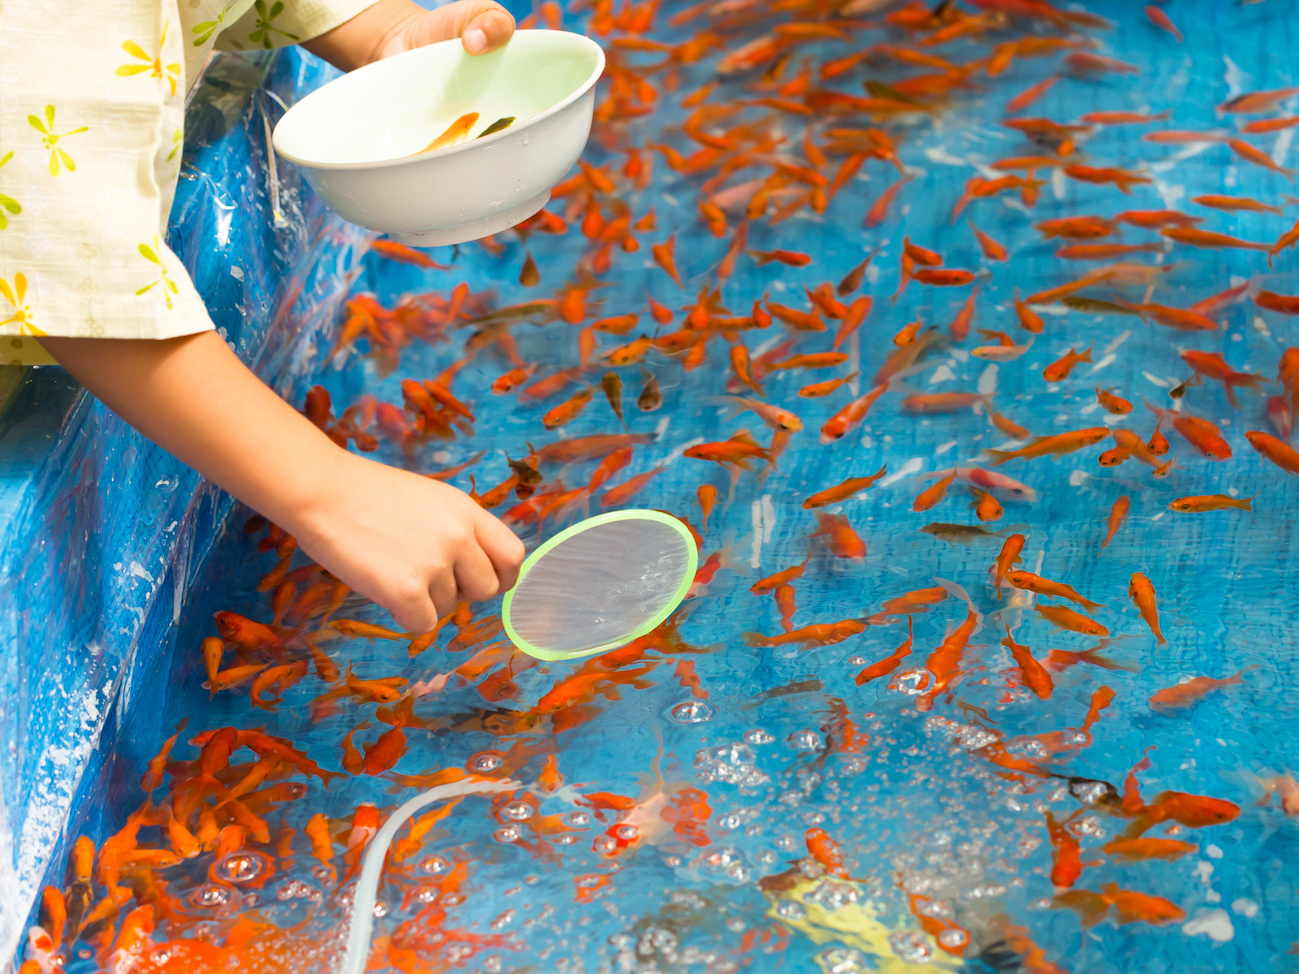

In [17]:
import numpy as np
import pandas as pd

In [25]:
sql_create_tables = """-- Fishes Table
CREATE TABLE fishes (
    id INT PRIMARY KEY,
    weights VARCHAR(3)
);

-- Customers Table
CREATE TABLE customers (
    id INT PRIMARY KEY,
    ages INT,
    genders VARCHAR(1)
);

-- Transactions Table
CREATE TABLE transactions (
    id INT PRIMARY KEY,
    cid INT,
    fid INT,
    FOREIGN KEY (cid) REFERENCES customers(id),
    FOREIGN KEY (fid) REFERENCES fishes(id)
);"""

In [18]:
np.random.seed(42)

In [19]:
fish_id = np.arange(1000) + 1
fish_weights = np.random.choice(
    ['XXL', 'XL', 'L', 'M', 'S', 'XS'],
    1000,
    replace=True,
    p=[.01, .04, .3, .3, .3, .05])

In [20]:
customer_id = np.arange(350) + 1
ages = np.random.randint(12, 60, 350)
genders = np.random.choice(
    ['M', 'F'],
    350, 
    replace=True,
    p=[.6, .4])

In [21]:
transaction_id = np.arange(600) + 1
transaction_customer_id = np.random.choice(customer_id, 600, replace=True)
transaction_fish_id = np.random.choice(fish_id, 600, replace=False)

In [22]:
fishes = pd.DataFrame({
    'id': fish_id,
    'weights': fish_weights,
})

customers = pd.DataFrame({
    'id': customer_id,
    'ages': ages,
    'genders': genders,
})

transactions = pd.DataFrame({
    'id': transaction_id,
    'cid': transaction_customer_id,
    'fid': transaction_fish_id,
})

In [26]:
with open('sql_create.txt', 'w') as outfile:
    outfile.write(sql_create_tables)

In [36]:
sql_insert_fishes = "INSERT INTO fishes (id, weights) VALUES " + ", ".join(fishes.apply(
    lambda r: str((r['id'], r['weights'])), axis=1
).to_list())

In [37]:
sql_insert_customers = "INSERT INTO customers (id, ages, genders) VALUES " + ", ".join(customers.apply(
    lambda r: str((r['id'], r['ages'], r['genders'])), axis=1
).to_list())

In [40]:
sql_insert_transactions = "INSERT INTO transactions (id, cid, fid) VALUES " + ", ".join(transactions.apply(
    lambda r: str((r['id'], r['cid'], r['fid'])), axis=1
).to_list())

In [43]:
for tb_name, sql_q in zip(['fishes', 'customers', 'transactions'],
                 [sql_insert_fishes, sql_insert_customers, sql_insert_transactions]):

    with open(f'sql_create_{tb_name}.txt', 'w') as outfile:
        outfile.write(sql_q)